In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
#loading the dataset
df=pd.read_csv('/kaggle/input/arketing-campaign/marketing_campaign.csv',delimiter=';')
#loading the dataset
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [5]:
#getting preliminary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
#checking whether it has null values or not
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [28]:
def preprocess_inputs(df):
    
    df=df.copy()
    #dropping id column from the dataset
    
    df=df.drop("ID",axis=1)
    
    #filling missing value from income column
    
    df['Income']=df['Income'].fillna(df['Income'].mean())
    df['Year']=df['Dt_Customer'].apply(lambda x:x.split('-')[0]).astype(int)
    df['Month']=df['Dt_Customer'].apply(lambda x:x.split('-')[1]).astype(int)
    df['Day']=df['Dt_Customer'].apply(lambda x:x.split('-')[2]).astype(int)
    df=df.drop("Dt_Customer",axis=1)
    
    
    EDUCATION_ENCODING={'Graduation':1, 'PhD':3, 'Master':2, 'Basic':0, '2n Cycle':4}
    
    df['Education']=df['Education'].replace(EDUCATION_ENCODING)
    MARITAL_ENCODING={'Single':0, 'Together':1, 'Married':2, 'Divorced':3, 'Widow':4, 'Alone':5,
       'Absurd':6, 'YOLO':7}
    df['Marital_Status']=df['Marital_Status'].replace(MARITAL_ENCODING)
    
    
    #Spliting the data between x and y
    
    y=df['Response']
    x=df.drop('Response',axis=1)
    
    #train_test_split
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True,random_state=123)
    
    
    #scaling the dataset
    
    scaler=StandardScaler()
    
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)
    return x_train,x_test,y_train,y_test
    
    

In [31]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
y_train

/tmp/ipykernel_36/1386565175.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education']=df['Education'].replace(EDUCATION_ENCODING)
/tmp/ipykernel_36/1386565175.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Marital_Status']=df['Marital_Status'].replace(MARITAL_ENCODING)


1584    1
203     1
1950    0
1812    0
925     0
       ..
1147    0
2154    0
1766    0
1122    0
1346    0
Name: Response, Length: 1568, dtype: int64

# Training the Model

In [32]:
x_train.shape

(1568, 29)

In [34]:
inputs=tf.keras.Input(shape=(29,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model=tf.keras.Model(inputs=inputs,outputs=outputs)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])
history=model.fit(x_train,y_train,validation_split=0.2,batch_size=32,epochs=100,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,
                                                                                                                           restore_best_weights=True)])

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8375 - auc: 0.4259 - loss: 0.5035 - val_accuracy: 0.8535 - val_auc: 0.7414 - val_loss: 0.3726
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8766 - auc: 0.8000 - loss: 0.3263 - val_accuracy: 0.8599 - val_auc: 0.8261 - val_loss: 0.3317
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8908 - auc: 0.8900 - loss: 0.2735 - val_accuracy: 0.8599 - val_auc: 0.8495 - val_loss: 0.3144
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8959 - auc: 0.9066 - loss: 0.2630 - val_accuracy: 0.8631 - val_auc: 0.8533 - val_loss: 0.3083
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8980 - auc: 0.9154 - loss: 0.2477 - val_accuracy: 0.8662 - val_auc: 0.8591 - val_loss: 0.3050
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9199 - auc: 0.9296 - loss: 0.2180 - val_accuracy: 0.8567 - val_auc: 0.8570 - val_loss: 0.3084
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

In [35]:
model.evaluate(x_test,y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8794 - auc: 0.8947 - loss: 0.2807 


[0.2778186500072479, 0.8883928656578064, 0.8865472078323364]

In [48]:
y_pred=np.squeeze(model.predict(x_test)>=0.5).astype(int)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


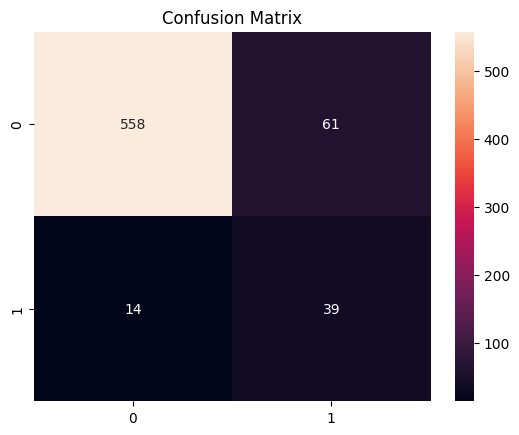

In [53]:
cm=confusion_matrix(y_pred,y_test)
plt.plot(shape=(10,14))
sns.heatmap(cm,annot=True,fmt='g')
plt.title("Confusion Matrix")
plt.show()

In [54]:
clr=classification_report(y_pred,y_test)
print(clr)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       619
           1       0.39      0.74      0.51        53

    accuracy                           0.89       672
   macro avg       0.68      0.82      0.72       672
weighted avg       0.93      0.89      0.90       672



In [22]:
df['Education'].unique()add

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [25]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)